<div style="position: relative; width: 100%; height: 100vh; padding: 50px; box-sizing: border-box;">
    <!-- Logo positioned in the right corner -->
    <img src="logo.png" style="position: absolute; top: 10px; right: 10px; width: 100px;"/>

   <!-- Proprietary Content -->
   <div style="position: absolute; bottom: px5; left: 5%; transform: translateX(-50%); color: grey; text-align: left;font-style: italic">
   <p>Proprietary content. © 10xTechClub. All Rights Reserved. Unauthorized use or distribution prohibited.</p>
   </div>
</div>

<h1 style="color:purple; text-align:center;">Grouping Employees by Age and Salary</h1>

<h1 style="color:red;">Problem Statement</h1>

**Scenario:** Imagine a company has information about its workers, like how old they are and how much money they make. The company wants to figure out if there are different kinds of workers based on these two things.

**Objective:** We will use a tool called KMeans to group workers into different categories based on their age and salary. This helps us see if there are patterns in how workers are grouped by age and money.




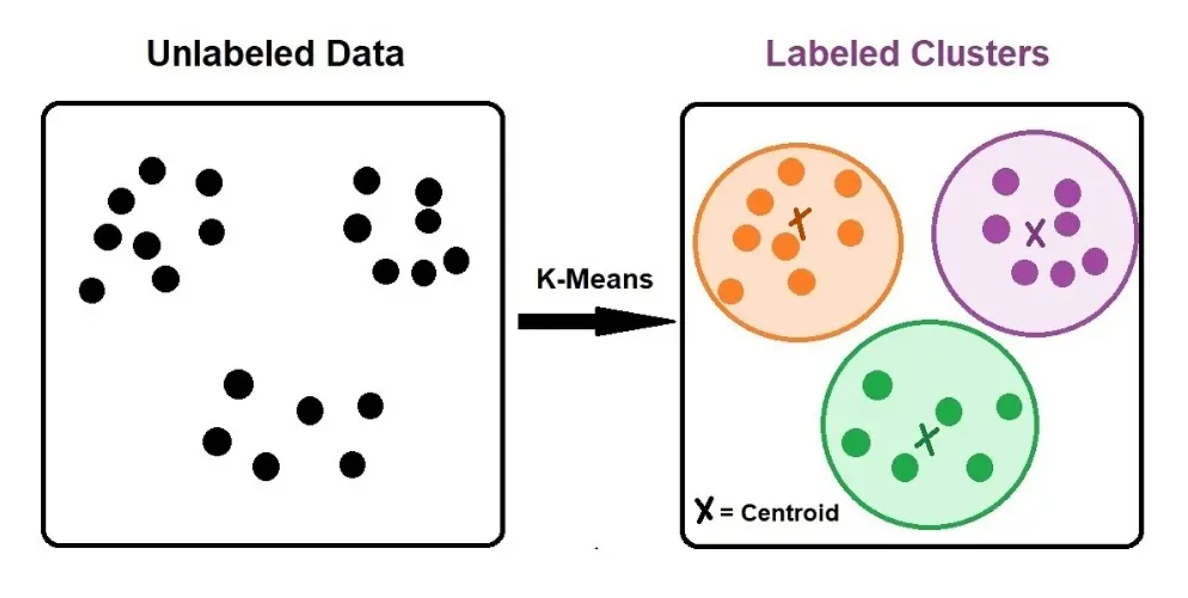

**Why We Are Doing This:**

1. **See Different Worker Types:** By grouping workers based on their age and salary, the company can understand if there are different types of workers. For example, it might find that younger workers earn more money, or that older workers earn different amounts.

2. **Plan Better:** Knowing about these different worker groups helps the company plan things like promotions and training. If the company knows which groups of workers need more training, they can offer special programs to help them.

3. **Fair Pay:** By understanding these groups, the company can make sure they are paying workers fairly. If some groups are paid less than others, the company can adjust salaries to be more fair.

4. **Targeted Training:** Different groups of workers might need different types of training. For example, younger workers might need help with skills for their jobs, while older workers might need different types of training.

**How It Works:**

1. **Collect Data:** We have a list of workers with their ages and salaries.
2. **Group Workers:** The KMeans tool helps us put workers into groups based on their age and salary.
3. **Find Patterns:** After grouping, we can see how workers are divided and understand the different types of workers in the company.

**Benefit:** This method helps the company understand its workers better and make decisions about promotions, pay, and training in a smart way.


## Importing Libraries

- sklearn.cluster.KMeans: This is the tool that helps us group (or cluster) workers based on their age and salary.
- pandas: A tool for reading and handling data in a structured format, like tables (similar to Excel).
- MinMaxScaler: A tool that adjusts numbers so that everything is on the same scale.This helps make sure that both age and salary are treated fairly   in grouping.
- pyplot: Part of the matplotlib library that allows us to create charts and visualizations.
- %matplotlib inline: Tells Jupyter Notebook to display the plots directly within the notebook.
- warnings.filterwarnings('ignore'): This hides any unnecessary warning messages so that our notebook looks cleaner.

In [18]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [19]:
import warnings
warnings.filterwarnings('ignore')
#pip install --upgrade numpy pandas scikit-learn----

## Loading the Data and Visualizing

- df = pd.read_csv("income.csv"): This reads the worker data from a file named income.csv and stores it in a variable df (short for DataFrame).
- df.head(): Shows the first few rows of the data, so we can see what our data looks like.
- plt.scatter(df.Age, df['Income']): Creates a scatter plot where the x-axis represents the workers' ages and the y-axis represents their salaries.
- plt.xlabel('Age') and plt.ylabel('Income($)'): These label the axes of the chart so we know what we are looking at.

In [20]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

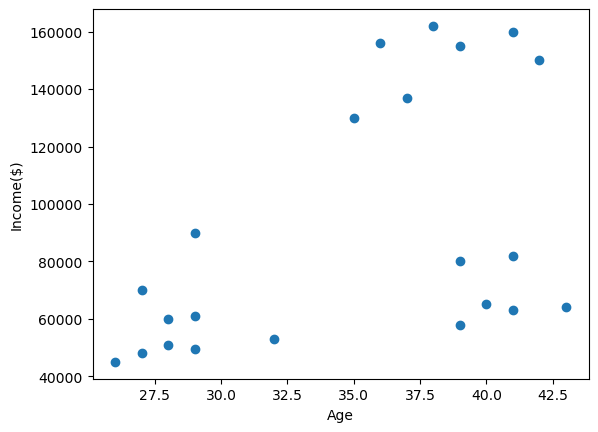

In [21]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

### Understanding Centroids in KMeans Clustering

In KMeans clustering, a **centroid** is the center point of a cluster. It represents the mean position of all the points in that cluster. The KMeans algorithm works by iteratively adjusting the centroids to minimize the distance between the data points and the centroid of their cluster.

1. **Initialization**: Choose K initial centroids randomly.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recalculate the centroids as the mean of all points assigned to each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change significantly.

The GIF below shows the KMeans clustering process, including how centroids move during each iteration.

### KMeans Clustering Animation

![KMeans Animation](https://assets.blog.code-specialist.com/k_means_animation_6cdd31d106.gif)


## Understanding Centroids in KMeans
- km = KMeans(n_clusters=3): We are using KMeans to create 3 clusters (groups). The number 3 means we want to divide the workers into 3 types based on their age and salary.
- km.fit_predict(df[['Age', 'Income($)']]): This tells KMeans to find patterns in the age and salary columns of our data and group the workers. The fit_predict function returns a list of group numbers (clusters) for each worker.
- df['cluster'] = y_predicted: Adds a new column to our data that shows which group (cluster) each worker belongs to.
km.cluster_centers_: Returns the center points (centroids) of the clusters. These are the "average" points for each group.

In [22]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


In [24]:
km.cluster_centers_

array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

## Visualizing the Clusters

- `df1 = df[df.cluster == 0]`: Selects all the workers from **Group 0** (first cluster).
- `df2 = df[df.cluster == 1]`: Selects all the workers from **Group 1** (second cluster).
- `df3 = df[df.cluster == 2]`: Selects all the workers from **Group 2** (third cluster).

### Plotting the Clusters:
- `plt.scatter(df1.Age, df1['Income($)'], color='green')`: Plots **Group 1** as green dots, based on **Age** and **Income**.
- `plt.scatter(df2.Age, df2['Income($)'], color='red')`: Plots **Group 2** as red dots.
- `plt.scatter(df3.Age, df3['Income($)'], color='black')`: Plots **Group 3** as black dots.

### Plotting the Centroids:
- `plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')`: Plots the **centroids** of each group as purple stars.

### Labels and Legend:
- `plt.xlabel('Age')`: Labels the **X-axis** as Age.
- `plt.ylabel('Income ($)')`: Labels the **Y-axis** as Income in dollars.
- `plt.legend()`: Adds a **legend** to explain the colors and symbols.


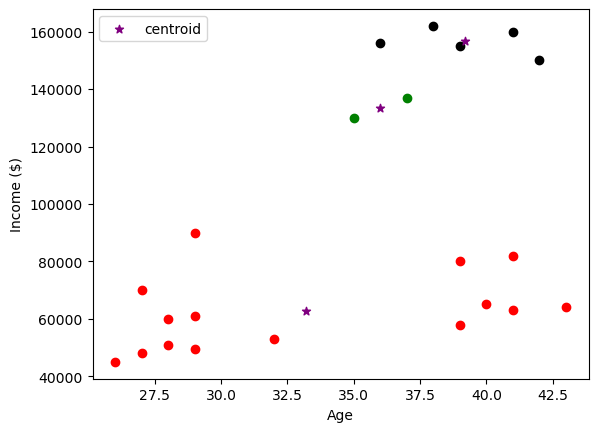

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>



<h4 style="color:red;">Why Do We Use MinMaxScaler?</h4>

**MinMaxScaler** is a tool that helps us prepare data before we group it using KMeans. 

### Here's Why We Use It:

1. **Make Data Easier to Compare:** 
   - Age and Income are on different scales. For example, Age might be between 20 and 60, but Income could be between 30,000 and 100,000. 
   - When we use MinMaxScaler, it changes the numbers so that Age and Income are on a similar scale (usually between 0 and 1). This makes it easier for the KMeans tool to compare them fairly.

2. **Better Grouping Results:**
   - Without scaling, the KMeans tool might think Income is more important than Age just because the numbers are bigger.
   - By using MinMaxScaler, both Age and Income are treated equally, leading to better and more accurate groups.

3. **Avoiding Bias:** 
   - If one number is much larger than another (like Income being much bigger than Age), it can confuse the grouping process.
   - Scaling with MinMaxScaler ensures that no feature (like Age or Income) unfairly influences the grouping.

**In short,** MinMaxScaler helps us make sure that Age and Income are both important when we are finding patterns in our workers' data.



### Scaling the Data

- `scaler = MinMaxScaler()`: 
  - Creates an instance of the **MinMaxScaler**, which adjusts the numbers for **Age** and **Income** so they are within a specific range (usually between 0 and 1).

- `scaler.fit(df[['Income($)']])` and `df['Income($)'] = scaler.transform(df[['Income($)']])`: 
  - This line **scales the salary data**, ensuring all income values are between **0 and 1**.

- `scaler.fit(df[['Age']])` and `df['Age'] = scaler.transform(df[['Age']])`: 
  - Similarly, this line **scales the age data**, transforming the age values to fall within the range of **0 to 1** as well.


In [26]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [27]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


## Re-Running KMeans After Scaling
- We are redoing the KMeans clustering after scaling the data to make sure both age and salary are considered equally.
- plt.scatter(df.Age, df['Income']): Creates a new scatter plot of the scaled data.
- km = KMeans(n_clusters=3), y_predicted = km.fit_predict(df[['Age', 'Income']]), and df['cluster'] = y_predicted: These steps group the workers again, but this time the data is properly scaled.

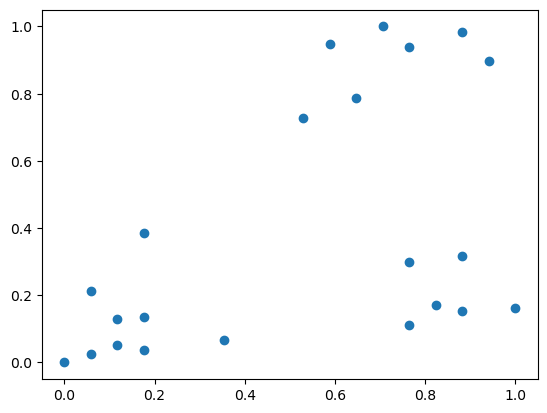

In [28]:
plt.scatter(df.Age,df['Income($)'])

In [29]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [30]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [31]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

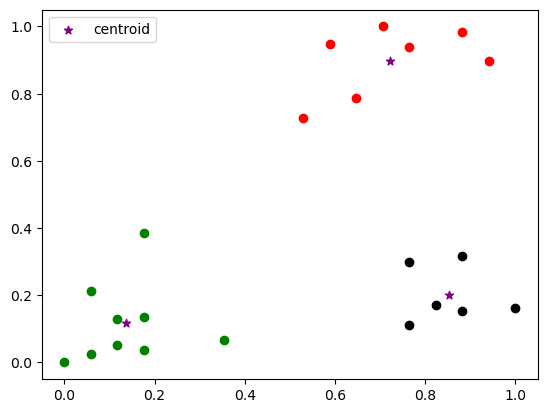

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

<h4 style="color:red;">What is an Elbow Plot?</h4>

An Elbow Plot helps us decide the best number of groups (clusters) for KMeans. 

### How It Works:

1. **Run KMeans** with different numbers of clusters.
2. **Measure Errors:** Check how well the data is grouped (using Sum of squared error).
3. **Plot Results:** Create a graph with the number of clusters on one side and errors on the other.
4. **Find the Elbow:** Look for the point where adding more clusters doesn’t reduce errors much. This is the best number of clusters.

**In simple terms,** the Elbow Plot helps find the right number of clusters by showing where adding more clusters stops making a big difference.


## Elbow Plot (Choosing the Number of Clusters)

- `k_rng = range(1, 10)`: 
  - We are trying **KMeans** with different numbers of clusters, from **1 to 9**.

- `sse = []`: 
  - This is an empty list where we will store the **errors** (how well or badly the data fits the clusters) for each number of clusters.

- `km = KMeans(n_clusters=k)`: 
  - This runs **KMeans** with **k** clusters.

- `km.fit(df[['Age', 'Income($)']])`: 
  - Fits the model using the **Age** and **Income** data.

- `sse.append(km.inertia_)`: 
  - **Inertia** measures how well the data fits the clusters. We add this value to our list for each cluster count.

- `plt.plot(k_rng, sse)`: 
  - Plots the number of clusters (**k**) on the x-axis and the **sum of squared errors (sse)** on the y-axis.
  - The **elbow point** is where the errors stop decreasing rapidly. This helps us find the **best number of clusters**.


In [33]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

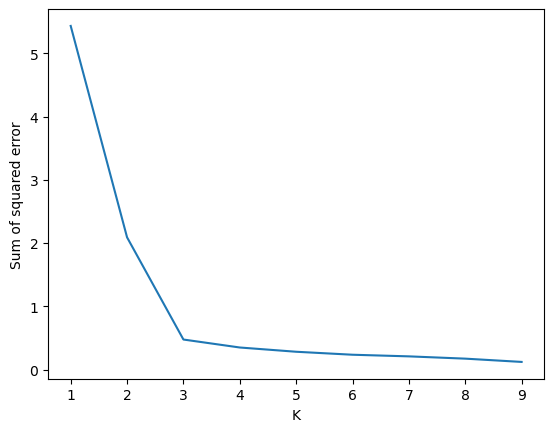

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Conclusion:

**Simple and Fast**: K-means is easy to understand and works quickly, even with lots of data. It groups things into clusters based on how close they are to each other.

**Clear Groups**: K-means forms clear, round clusters that are easy to see and explain. This makes it a great starting point for many projects.

**Works with Large Data**: If you have a big dataset, K-means handles it well and still gives good results without taking too long.

**Adjustable Clusters**: You can choose how many groups (clusters) you want, making it flexible for different types of projects.

Other methods like DBSCAN are great for more complex shapes, but K-means is often the easiest and most straightforward for most data.